<a href="https://colab.research.google.com/github/larunerdman/JSC270_Lab3/blob/new_branch/JSC270_Lab3_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 3: Linear regression

###Libraries we'll need for this lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Getting started: Data for this lab
####                Real estate value for Sindian Dist., New Taipei City, Taiwan

In [2]:
house_prices = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")

In [3]:
house_prices.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
house_prices.columns = ['ID','trans_date','house_age_yr','dist_to_MRT','n_cstores','latitude','longitude','house_price']

####Let's transform some of our variables

####Compare logged house prices to make them more evenly distributed (instead of clumped on one side)

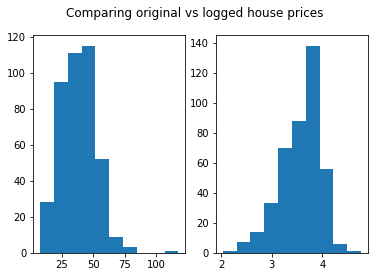

In [18]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing original vs logged house prices')
plt1.hist(house_prices.house_price) ## let's log our house prices
plt2.hist(np.log(house_prices.house_price)) ## let's log our house prices
fig.show()

####Log transform the distance to the MRT, again to spread it out a bit

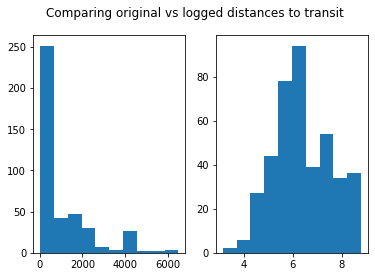

In [20]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing original vs logged distances to transit')
plt1.hist(house_prices.dist_to_MRT) ## let's log our house prices
plt2.hist(np.log(house_prices.dist_to_MRT)) ## let's log our house prices
fig.show()

####Create new variables in your dataframe of these logged variables

In [7]:
house_prices['log_dMRT'] = np.log(house_prices.dist_to_MRT)
house_prices['log_hp'] = np.log(house_prices.house_price)

##Linear regression

#### Let's fit and plot a basic linear regression with logged house price as the dependent variable and logged distance to the MRT as the dependent variable


In [8]:
reg1 = smf.ols('log_hp ~ log_dMRT', data = house_prices).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_hp   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     566.4
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.15e-79
Time:                        16:06:41   Log-Likelihood:                -20.691
No. Observations:                 414   AIC:                             45.38
Df Residuals:                     412   BIC:                             53.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2713      0.073     72.496      0.0

##Question: How do we interpret the log distance to MRT coefficient as it relates to the log house price? 

####Plot the fit of your model

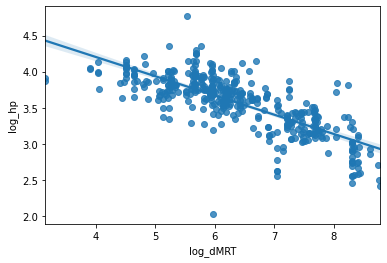

In [9]:
sns.regplot(x='log_dMRT', y='log_hp', data=house_prices)

####Let's check out the leverage of specific points.  

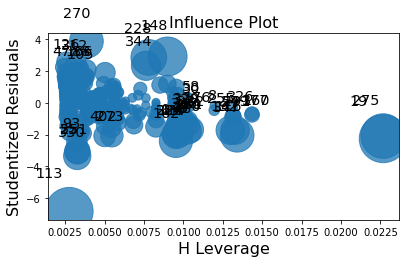

In [10]:
fig = sm.graphics.influence_plot(reg1, criterion="cooks")
fig.tight_layout(pad=2.0)

##Question: Do any of the high-influence points also have large residuals? What should we do at this point?

###Let's control for house_age_yr in our regression

In [11]:
reg2 = smf.ols('log_hp ~ log_dMRT + house_age_yr', data = house_prices).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_hp   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     305.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           4.53e-82
Time:                        16:06:42   Log-Likelihood:                -11.062
No. Observations:                 414   AIC:                             28.12
Df Residuals:                     411   BIC:                             40.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.3350      0.073     73.516   

####Let's now look at the partial regression of our outcome with each variable controlling for each other variable in the regression. Note that the slopes here should be the same as the estimated slopes in the regression. That is: this is what your regession is actually fitting the coefficients from.

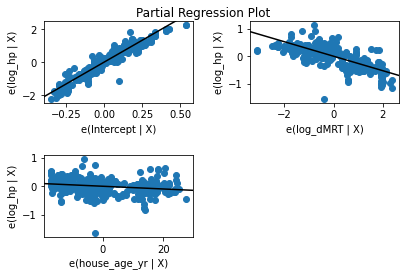

In [12]:
fig = sm.graphics.plot_partregress_grid(reg2)
fig.tight_layout(pad=2.0)

##Logistic regression

####Let's look at our house prices again and create a binary variable of the price which we can use to predict which houses are going to be "high cost" (>50) and which will be "low cost" (<=50)

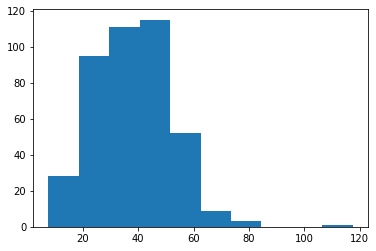

In [13]:
plt.hist(house_prices.house_price) 
plt.show()

In [14]:
house_prices['hp_bin'] = (house_prices.house_price > 50).astype(int)
house_prices.hp_bin.value_counts()

0    341
1     73
Name: hp_bin, dtype: int64

####Now let's fit a logistic regression with the same predictors as our linear regression but this time with a binary outcome indicating whether the house is in the "high priced" category or not 

In [15]:
logreg1 = smf.logit('hp_bin ~ log_dMRT + house_age_yr', data = house_prices).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.328038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 hp_bin   No. Observations:                  414
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.2957
Time:                        16:06:43   Log-Likelihood:                -135.81
converged:                       True   LL-Null:                       -192.83
Covariance Type:            nonrobust   LLR p-value:                 1.715e-25
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4411      1.125      6.613      0.000       5.236       9.647
log_dMRT        -1.3465

##Questions: 
## 1. How do you interpret these coefficients? 
## 2. Do the variable trends remain the same in the binary model? 